In [2]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import pandas as pd
import healpy as hp
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots

from mafContrib import TransientAsciiMetric

import warnings
warnings.filterwarnings('ignore')

# i/o database
opsdb = db.OpsimDatabase('./baseline2018a.db')
outDir = 'Transients'
resultsDb = db.ResultsDb(outDir)

In [35]:
help(metrics.TransientMetric)

Help on class TransientMetric in module lsst.sims.maf.metrics.transientMetrics:

class TransientMetric(lsst.sims.maf.metrics.baseMetric.BaseMetric)
 |  Calculate what fraction of the transients would be detected. Best paired with a spatial slicer.
 |  We are assuming simple light curves with no color evolution.
 |  
 |  Parameters
 |  ----------
 |  transDuration : float, optional
 |      How long the transient lasts (days). Default 10.
 |  peakTime : float, optional
 |      How long it takes to reach the peak magnitude (days). Default 5.
 |  riseSlope : float, optional
 |      Slope of the light curve before peak time (mags/day).
 |      This should be negative since mags are backwards (magnitudes decrease towards brighter fluxes).
 |      Default 0.
 |  declineSlope : float, optional
 |      Slope of the light curve after peak time (mags/day).
 |      This should be positive since mags are backwards. Default 0.
 |  uPeak : float, optional
 |      Peak magnitude in u band. Default 20.

In [18]:

# metric, slicer, sqlconstraint
metric = metrics.TransientMetric(riseSlope=-2, declineSlope=0.25, transDuration = 60, peakTime=5,rPeak=20,metricName='Alert')
slicer = slicers.HealpixSlicer(nside=64)
sqlconstraint = 'filter="r"'

transientSky = metricBundles.MetricBundle(metric,slicer, sqlconstraint)

bundleDict = {'transientSky':transientSky}
group = metricBundles.MetricBundleGroup(bundleDict, opsdb,outDir=outDir,resultsDb=resultsDb)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint filter="r" for columns ['fieldRA', 'filter', 'fieldDec', 'observationStartMJD', 'fiveSigmaDepth']
Found 515172 visits
Running:  ['transientSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.
monopole: 0.26446  dipole: lon: -76.335, lat: -46.2103, amp: 0.0329731
Plotting complete.


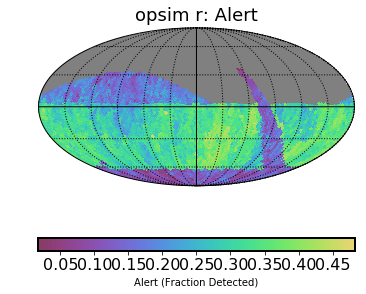

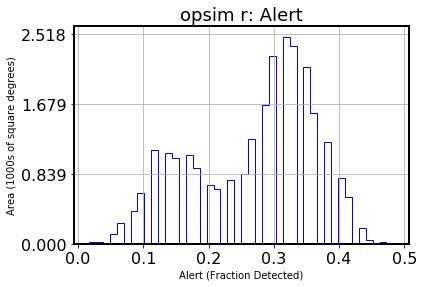

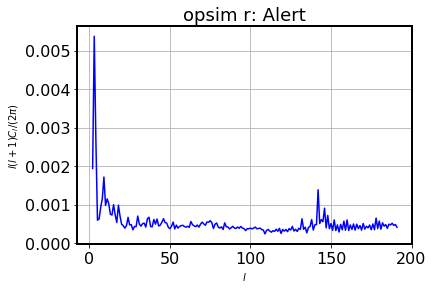

In [19]:
# run
group.runAll()
group.plotAll(closefigs=False)

In [32]:
dat=transientSky.metricValues

In [33]:
len(dat)

49152

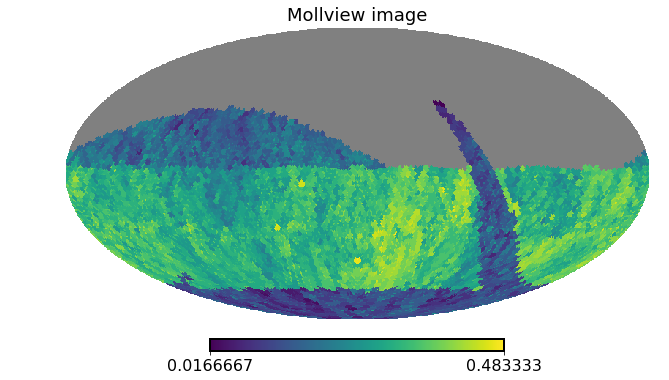

In [57]:
hp.mollview(dat, nest=False, title="Mollview image")

In [59]:
dat.data.shape

(49152,)

In [60]:
type(dat)

numpy.ma.core.MaskedArray

In [73]:
metricSeries = pd.Series(dat).dropna()

In [78]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        array

(array([  1.90000000e+01,   3.00000000e+01,   0.00000000e+00,
          1.36000000e+02,   0.00000000e+00,   2.97000000e+02,
          0.00000000e+00,   4.69000000e+02,   7.20000000e+02,
          0.00000000e+00,   1.33500000e+03,   0.00000000e+00,
          1.29100000e+03,   0.00000000e+00,   1.21900000e+03,
          0.00000000e+00,   1.26500000e+03,   1.07600000e+03,
          0.00000000e+00,   8.38000000e+02,   0.00000000e+00,
          7.76000000e+02,   0.00000000e+00,   9.13000000e+02,
          1.00100000e+03,   0.00000000e+00,   1.49100000e+03,
          0.00000000e+00,   1.98900000e+03,   0.00000000e+00,
          2.68400000e+03,   0.00000000e+00,   2.95800000e+03,
          2.82300000e+03,   0.00000000e+00,   2.52900000e+03,
          0.00000000e+00,   1.86300000e+03,   0.00000000e+00,
          1.45500000e+03,   0.00000000e+00,   9.47000000e+02,
          6.68000000e+02,   0.00000000e+00,   2.32000000e+02,
          0.00000000e+00,   6.00000000e+01,   0.00000000e+00,
        

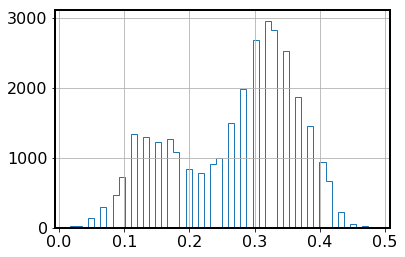

In [88]:
plt.hist(metricSeries,bins=50,histtype='step',cumulative=False)

(array([  1.90000000e+01,   4.90000000e+01,   4.90000000e+01,
          1.85000000e+02,   1.85000000e+02,   4.82000000e+02,
          4.82000000e+02,   9.51000000e+02,   1.67100000e+03,
          1.67100000e+03,   3.00600000e+03,   3.00600000e+03,
          4.29700000e+03,   4.29700000e+03,   5.51600000e+03,
          5.51600000e+03,   6.78100000e+03,   7.85700000e+03,
          7.85700000e+03,   8.69500000e+03,   8.69500000e+03,
          9.47100000e+03,   9.47100000e+03,   1.03840000e+04,
          1.13850000e+04,   1.13850000e+04,   1.28760000e+04,
          1.28760000e+04,   1.48650000e+04,   1.48650000e+04,
          1.75490000e+04,   1.75490000e+04,   2.05070000e+04,
          2.33300000e+04,   2.33300000e+04,   2.58590000e+04,
          2.58590000e+04,   2.77220000e+04,   2.77220000e+04,
          2.91770000e+04,   2.91770000e+04,   3.01240000e+04,
          3.07920000e+04,   3.07920000e+04,   3.10240000e+04,
          3.10240000e+04,   3.10840000e+04,   3.10840000e+04,
        

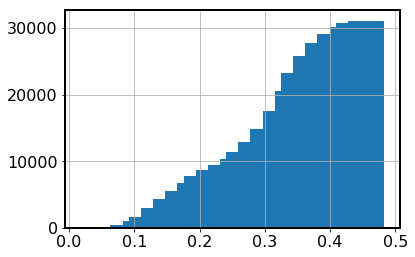

In [91]:
plt.hist(metricSeries,bins=50,histtype='bar',cumulative=True)

In [92]:
help(metric.lightCurve)

Help on method lightCurve in module lsst.sims.maf.metrics.transientMetrics:

lightCurve(time, filters) method of lsst.sims.maf.metrics.transientMetrics.TransientMetric instance
    Calculate the magnitude of the object at each time, in each filter.
    
    Parameters
    ----------
    time : numpy.ndarray
        The times of the observations.
    filters : numpy.ndarray
        The filters of the observations.
    
    Returns
    -------
    numpy.ndarray
        The magnitudes of the object at each time, in each filter.



(35, 18)

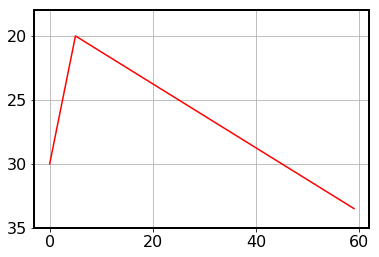

In [178]:
# light curve
metric = metrics.TransientMetric(riseSlope=-2., declineSlope=0.25, transDuration = 60,rPeak=20,peakTime=5,metricName='Alert')

band='r'
times=np.arange(0,60,1)
filters=np.array([band]*times.size)
lc = metric.lightCurve(times,filters)

plt.plot(times,lc,color=band)
plt.ylim([35,18])

In [141]:
help(TransientAsciiMetric)

Help on class TransientAsciiMetric in module mafContrib.transientAsciiMetric:

class TransientAsciiMetric(lsst.sims.maf.metrics.baseMetric.BaseMetric)
 |  Based on the transientMetric, but uses an ascii input file and provides option to write out lightcurve.
 |  
 |  Calculate what fraction of the transients would be detected. Best paired with a spatial slicer.
 |  The lightcurve in input is an ascii file per photometric band so that different lightcurve
 |  shapes can be implemented.
 |  
 |  Parameters
 |  ----------
 |  asciifile : str
 |      The ascii file containing the inputs for the lightcurve (per filter):
 |      File should contain three columns - ['ph', 'mag', 'flt'] -
 |      of phase/epoch (in days), magnitude (in a particular filter), and filter.
 |  surveyDuration : float, optional
 |      Length of survey (years).
 |      Default 10 or maximum of timespan of observations.
 |  surveyStart : float, optional
 |      MJD for the survey start date.
 |      Default None (use

(22, 17)

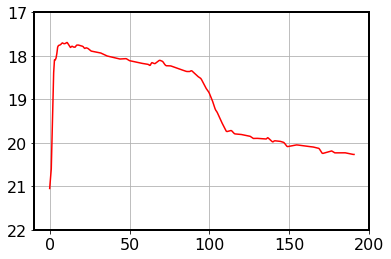

In [11]:
# light curve from ascii file
asciiLC = '2013ab_1.dat'
transmetric = TransientAsciiMetric(asciiLC, surveyDuration=1, mjdCol='observationStartMJD', 
                                   detectSNR={'u':5,'g':5,'r':5,'i':5,'z':5,'y':5},
                                  nPreT=0,preT=0,nFilters=0,filterT=None,nPerLC=0,peakOffset=0,dataout=True)

times = np.arange(0,transmetric.transDuration,0.5)
band = 'r'
filters = np.array([band]*times.size)
lc = transmetric.make_lightCurve(times,filters)

plt.plot(times,lc,color=band)
plt.ylim([22,17])


In [7]:
transmetric.transDuration

190.86000000000001

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database SummaryAllProps with constraint filter = "r" and night<365 for columns ['observationStartMJD', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'filter']
Found 39324 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "r" and night<365" constraint now.
monopole: 0.267041  dipole: lon: -113.55, lat: -2.21181, amp: 0.141614
Plotting complete.


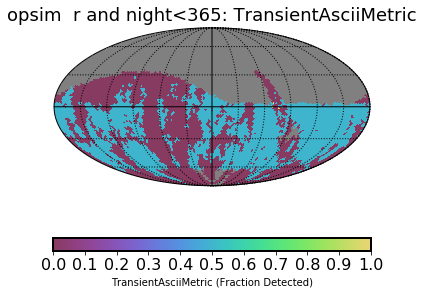

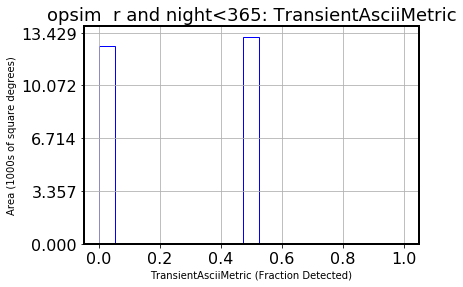

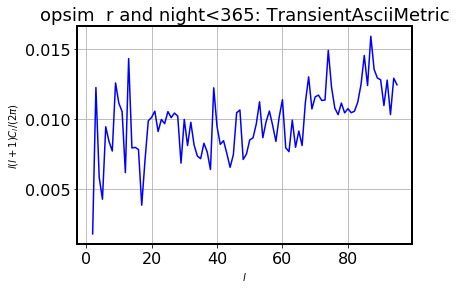

In [8]:
transmetric = TransientAsciiMetric('2013ab_1.dat', surveyDuration=1, mjdCol='observationStartMJD', 
                                   detectSNR={'r':5},
                                  nPreT=0,preT=0,nFilters=0,filterT=None,nPerLC=2,peakOffset=0,dataout=False)
slicer = slicers.HealpixSlicer(nside=32)
sqlconstraint = 'filter = "r" and night<365'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky},opsdb,outDir=outDir,resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

monopole: 0.328438  dipole: lon: -65.2368, lat: 47.9996, amp: 0.0514049


{'SkyMap': 1, 'Histogram': 2, 'PowerSpectrum': 3}

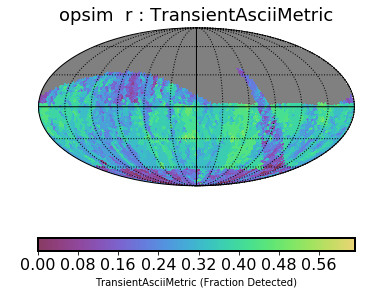

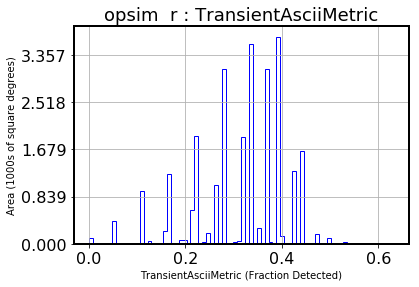

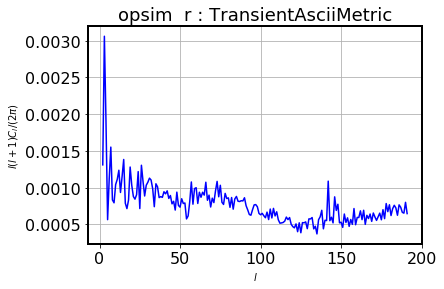

In [4]:
transmetricSky.plot()

(array([  3.74700000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.92400000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

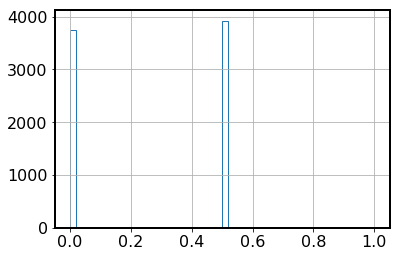

In [9]:
det = pd.Series(transmetricSky.metricValues).dropna()
plt.hist(det,bins=50,histtype='step')

(array([ 3747.,  3747.,  3747.,  3747.,  3747.,  3747.,  3747.,  3747.,
         3747.,  3747.,  3747.,  3747.,  3747.,  3747.,  3747.,  3747.,
         3747.,  3747.,  3747.,  3747.,  3747.,  3747.,  3747.,  3747.,
         3747.,  7671.,  7671.,  7671.,  7671.,  7671.,  7671.,  7671.,
         7671.,  7671.,  7671.,  7671.,  7671.,  7671.,  7671.,  7671.,
         7671.,  7671.,  7671.,  7671.,  7671.,  7671.,  7671.,  7671.,
         7671.,  7674.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 1 Patch objects>)

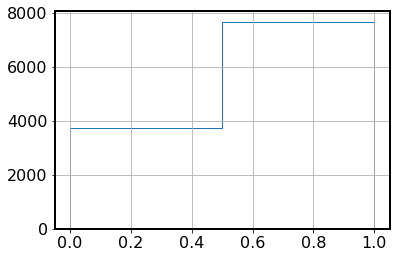

In [10]:
plt.hist(det,bins=50,histtype='step',cumulative=True)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


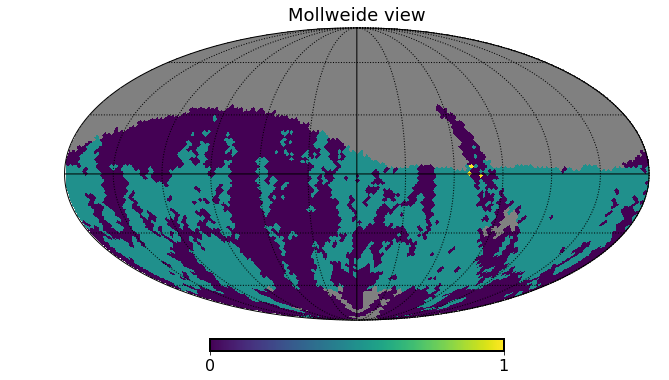

In [17]:
hp.mollview(transmetricSky.metricValues,nest=False)
hp.graticule()


In [ ]:
ra = np.array()
dec = np.array()